In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df=pd.read_csv('../../data/processed/chakala_cleaned.csv')
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,RH,WS,WD,HOUR,MONTH
0,2020-12-08 09:00:00,90.16,164.92,27.58,42.72,38.77,0.73,7.00,33.40,0.24,226.94,9,12
1,2020-12-08 10:00:00,92.55,179.31,18.75,38.75,38.93,0.68,19.25,32.26,0.22,82.35,10,12
2,2020-12-08 11:00:00,72.86,185.50,13.54,35.00,33.12,0.61,38.25,31.89,0.16,49.02,11,12
3,2020-12-08 12:00:00,70.44,166.99,16.41,19.86,35.42,0.55,56.00,29.67,0.18,124.27,12,12
4,2020-12-08 13:00:00,58.97,160.17,9.31,17.02,34.98,0.38,56.00,28.29,0.21,170.20,13,12


# **LinearRegression** 

In [3]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [4]:
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'O',
 'HOUR',
 'WS',
 'WD',
 'AT']
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features

In [5]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (14222, 6)
Test data size: (6096, 6)


In [6]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [7]:
print('Intercept:',lr_model.intercept_)
# represents the expected value of the target variable when all predictor variables are equal to zero
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))
# the coefficient value represents the slope of the line that best fits the relationship 
# between a predictor variable and the target variable. Specifically, the coefficient value 
# indicates the change in the expected value of the target variable for a one-unit change in 
# the corresponding predictor variable, holding all other predictor variables constant.

Intercept: 41.603082882035814
--------------------------------
Slope:


[('CO', 11.417779163759606),
 ('Ozone', 8.780948812265747),
 ('PM2.5', 19.540784901098974),
 ('PM10', -11.077398157606973),
 ('NO', 9.450890434953926),
 ('WD', -1.4470882046685762)]

In [8]:
y_pred=lr_model.predict(X_test)                      #predict using the model
x_pred=lr_model.predict(X_train)                      #predict using the model
lrRmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('RMSE of predicted NO in LR model:',lrRmse)

RMSE of predicted NO in LR model: 26.516314904690564


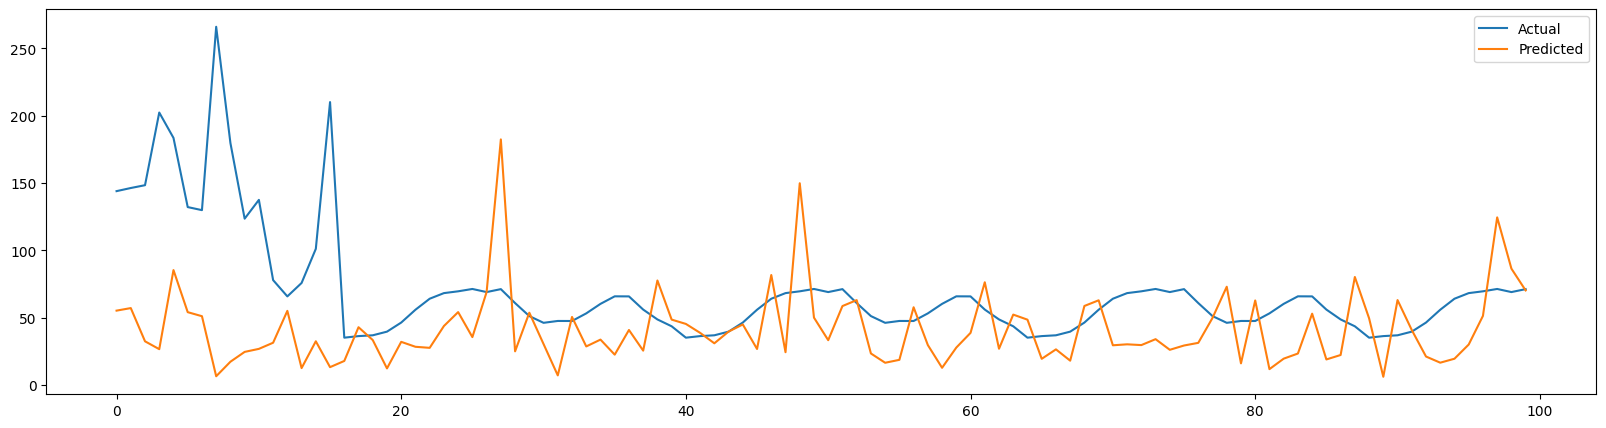

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred, y_pred])[19500:19600], label='Predicted')
plt.legend()
plt.show()

# **Random Forest**

In [10]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   
from sklearn.ensemble import RandomForestRegressor           

col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)           
y_pred_rf=rf_model.predict(X_test)   
x_pred_rf=rf_model.predict(X_train)   
RF_rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))      
print('RMSE of predicted PM2.5 in RF model:',RF_rmse)

Training data size: (14222, 6)
Test data size: (6096, 6)
RMSE of predicted PM2.5 in RF model: 19.191804551738123


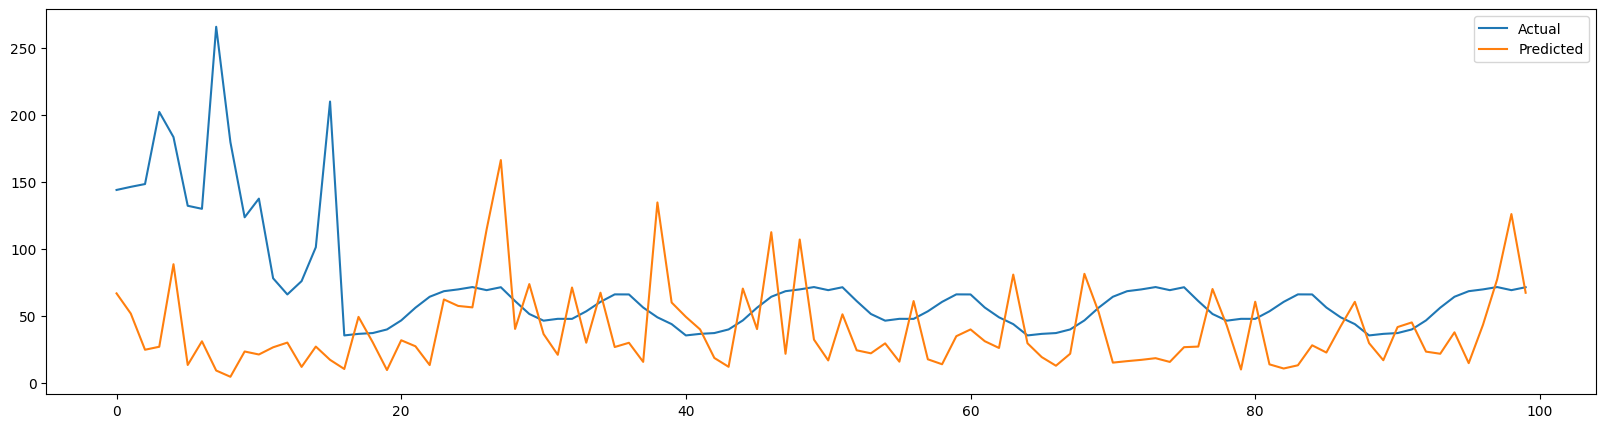

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred_rf, y_pred_rf])[19500:19600], label='Predicted')
plt.legend()
plt.show()

# **Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeRegressor
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)
y_pred_dtone=dt_model.predict(X_test)
x_pred_dtone=dt_model.predict(X_train)
DT_rmse=np.sqrt(mean_squared_error(y_test,y_pred_dtone))
print('RMSE of predicted PM2.5 in DT model:',DT_rmse)

Training data size: (14222, 6)
Test data size: (6096, 6)
RMSE of predicted PM2.5 in DT model: 27.24324226970201


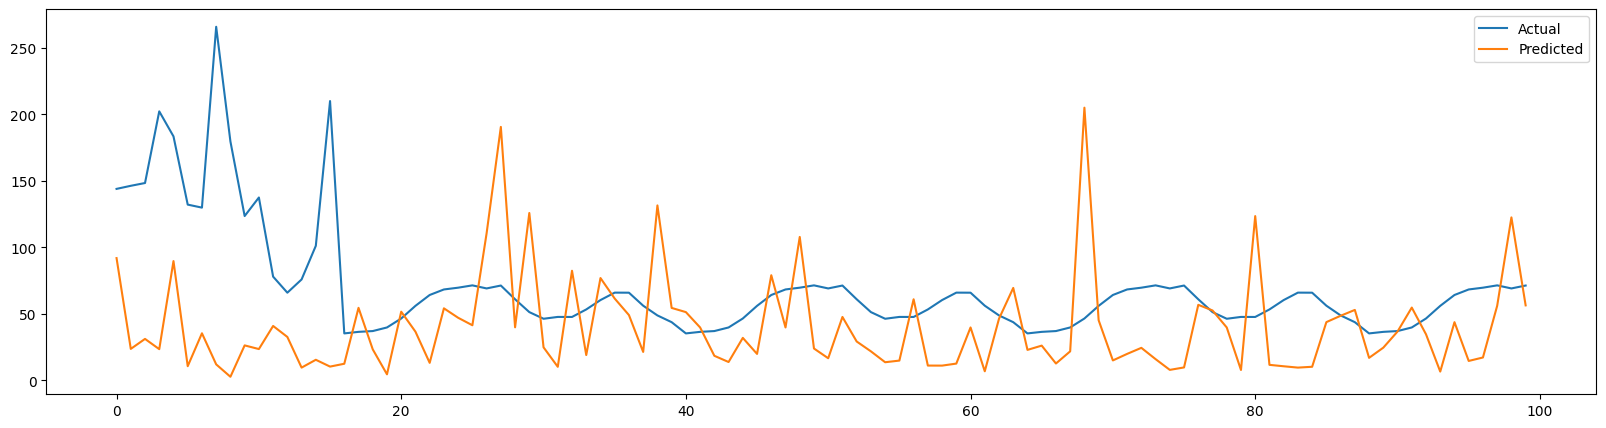

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred_dtone, y_pred_dtone])[19500:19600], label='Predicted')
plt.legend()
plt.show()

# **SVM model**

In [14]:
from sklearn.svm import SVR
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
sv_reg=SVR()
sv_model=sv_reg.fit(X_train,y_train) 
y_pred_sv=sv_model.predict(X_test) 
x_pred_sv=sv_model.predict(X_train) 
SV_rmse=np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of predicted PM2.5 in SVM model:',SV_rmse)

Training data size: (14222, 6)
Test data size: (6096, 6)
RMSE of predicted PM2.5 in SVM model: 24.030980657248612


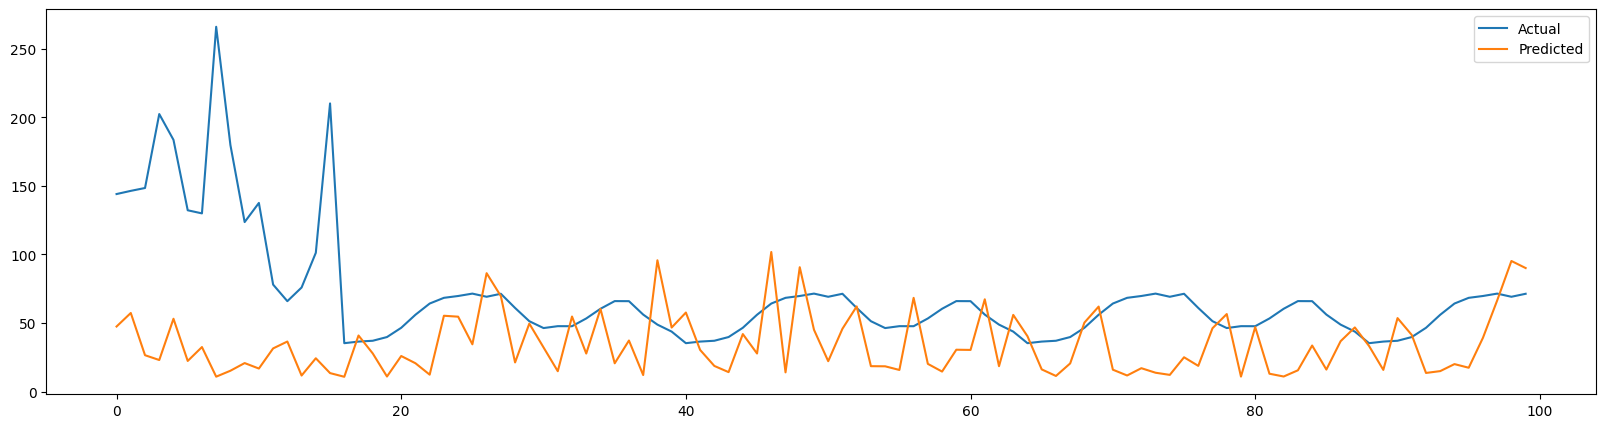

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred_sv, y_pred_sv])[19500:19600], label='Predicted')
plt.legend()
plt.show()

# **LSTM model**

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
n_steps = 1
n_features = X_train.shape[1]
X_train_lstm = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.reshape((X_test.shape[0], n_steps, n_features))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse') 

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_lstm = lstm_model.predict(X_test_lstm)
x_pred_lstm = lstm_model.predict(X_train_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print('Training data size:', X_train_lstm.shape)
print('Test data size:', X_test_lstm.shape)
print('RMSE of predicted PM2.5 in LSTM model:', lstm_rmse)


445/445 [==============================] - 1s 3ms/step
Training data size: (14222, 1, 6)
Test data size: (6096, 1, 6)
RMSE of predicted PM2.5 in LSTM model: 22.330793541760674


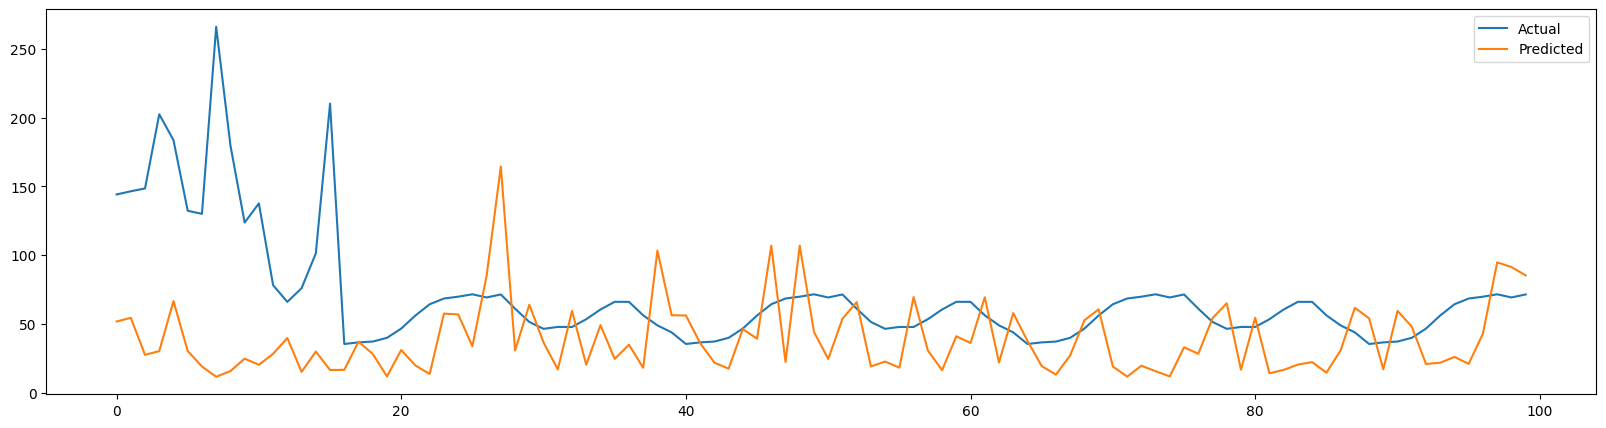

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred_lstm, y_pred_lstm])[19500:19600], label='Predicted')
plt.legend()
plt.show()

# **Gradient boosting**

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features 
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
gb_reg = GradientBoostingRegressor()
gb_model = gb_reg.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
x_pred_gb = gb_model.predict(X_train)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)
GB_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('RMSE of predicted PM2.5 in gradient boosting model:', GB_rmse)

Training data size: (14222, 6)
Test data size: (6096, 6)
RMSE of predicted PM2.5 in gradient boosting model: 21.0024318080191


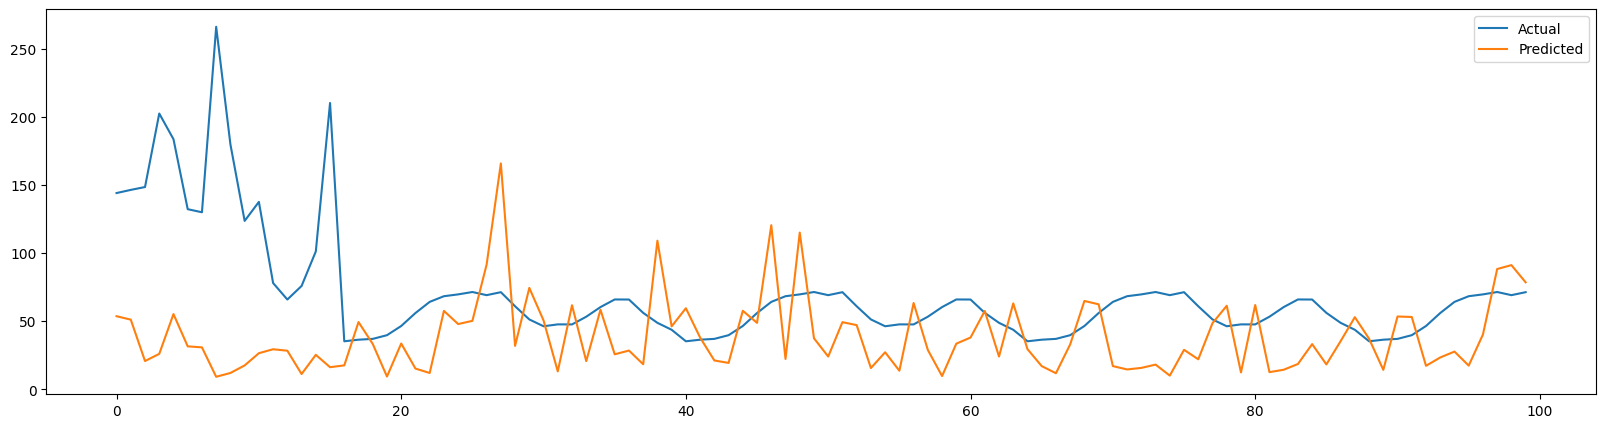

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[19500:19600], label='Actual')
plt.plot(np.concatenate([x_pred_gb, y_pred_gb])[19500:19600], label='Predicted')
plt.legend()
plt.show()